# Human Resources Study

This study is around an IT Company to perform Data visualization techniques, Exploratory Data Analysis & Machine Learning models to predict Employee Termination.

## Overview

This data set took from Kaggle revolves around a fictitious company and contains a lot of informations on the human resources : **names**, **DOBs**, **age**, **gender**, **marital status**, **date of hire**, **reasons for termination**, **department**, whether they are **active or terminated**, **position title**, **pay rate**, **manager name**, **performance score**, **absences**, **most recent performance review date**, and **employee engagement score**.

In a **first part**, many points of interest can be explored through all these variables. Because grasping relevant information is the key to set up a good management, it is important for companies to study this kind of dataset and sometimes when it's needed, make new decisions.
Thus, to help our company to evolve, a lot of questions can be addressed thanks to data analysis :
- Is the performance score unequal between different areas of the company ?
- Is there any relationship between who a person works for and their performance score ?
- What is the overall diversity profile of the organization ?
- What are our best recruiting sources if we want to ensure a diverse organization ?
- Are there areas of the company where pay is not equitable ?
- Can we get an intuition on who are the terminated employees ?
- Which profiles tend to cumulate absences or to have a poor satisfaction working in the company ?

In a **second part**, we'll try to address the following question :
- Can we predict who is going to terminate and who isn't ? What level of accuracy can we achieve on this ?

It will be done creating several Supervised Machine Learning models, built following all the preprocessing steps, setting up a full pipeline. We will also try to increase the accuracy of our models using Hyperparameter tuning, which will allow us to select the best one with K-Fold Cross Validation and the best evaluation metric.

## Part 1. Analyzing Human Resources through Data visualization techniques, Exploratory Data Analysis

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, let's import the csv dataset.

In [114]:
df = pd.read_csv('HRDataset_v14.csv')

It's also important to check the datatype of all our variables, how many observations we have and whether or not there are missing values. Here, no imputation will be needed.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [49]:
# Check unique values for each fields except a few ones not so relevant
for c in df.columns:
  if df[c].dtype == object and (c not in ('Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date', 'ManagerName')):
    print(c, df[c].unique())

Position ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
State ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']
Sex ['M ' 'F']
MaritalDesc ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
CitizenDesc ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
HispanicLatino ['No' 'Yes' 'no' 'yes']
RaceDesc ['White'

In [115]:
# Summary statistics of quantitative variables
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


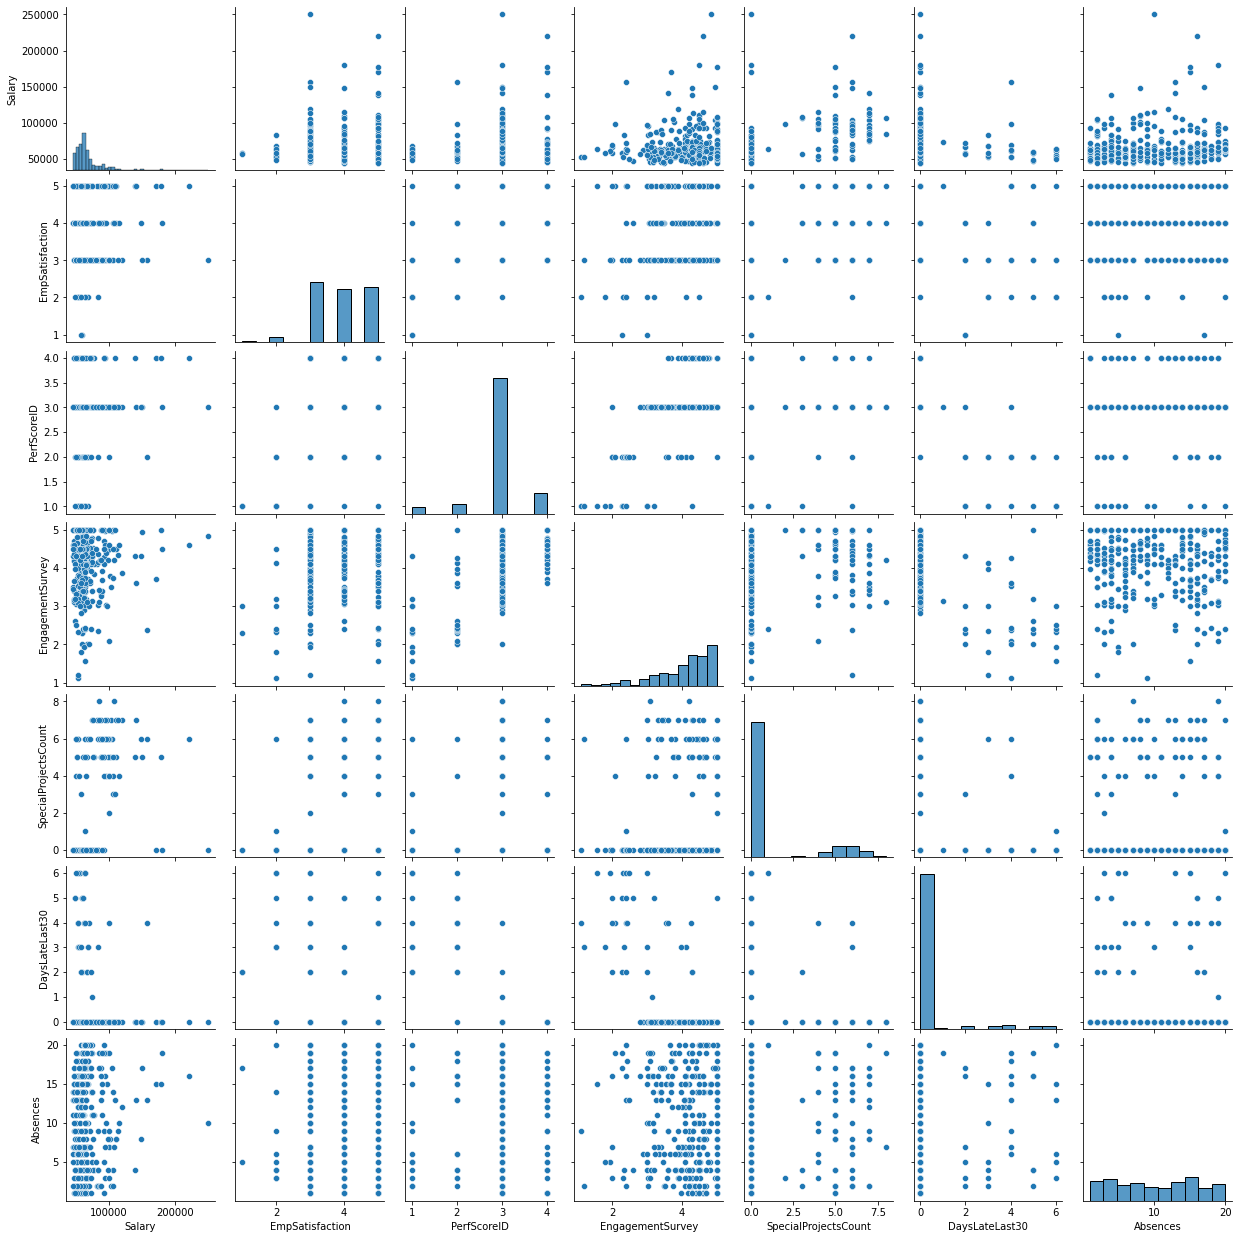

In [117]:
#pairplots are useful to get a first intuition of potential correlations
sns.pairplot(df[['Salary','EmpSatisfaction', 'PerfScoreID', 'EngagementSurvey','SpecialProjectsCount','DaysLateLast30','Absences']])

In [50]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## Adressing core questions

### *Is the performance score unequal between different areas of the company ? Can we detect any relationship between who a person works for and their performance score ?*

First, let's remind what are the unique values in PerformanceScore feature :

In [51]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

How is PerformanceScore distributed in the dataset ?

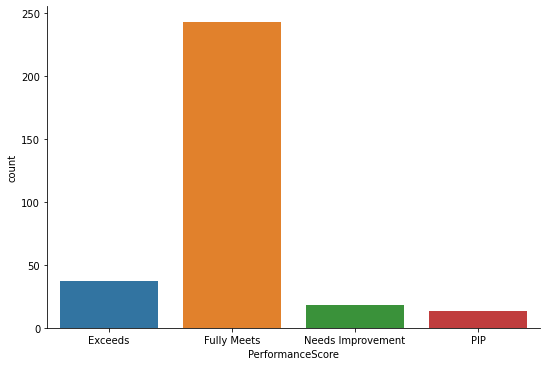

In [52]:
sns.catplot(x='PerformanceScore', data=df, kind="count",height=5, aspect=1.5)

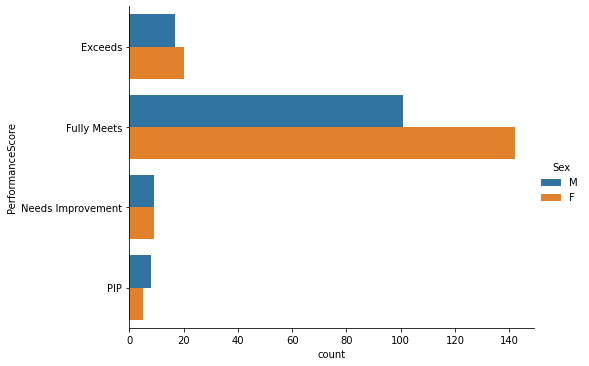

In [53]:
sns.catplot(y='PerformanceScore', hue='Sex', data=df, kind="count", height=5, aspect=1.5)

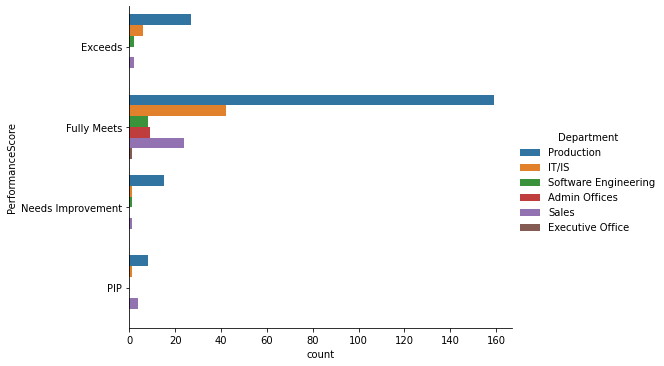

In [54]:
sns.catplot(y='PerformanceScore', hue='Department', data=df, kind="count", height=5, aspect=1.5)

In [55]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [56]:
perfs = ['Exceeds', 'Needs Improvement', 'PIP', 'Fully Meets']
dps = ['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Executive Office', 'Sales']
palette1 ={"IT/IS": "C0", "Production       ": "C1", "Software Engineering": "C2", "Admin Offices":"C3", "Sales": "C4", "Executive Office":"C5"}
palette2 ={"Exceeds": "C0", "Needs Improvement": "C1", "PIP": "C2", "Fully Meets":"C3"}

The histogram below allows us to see the conditional probability of Department given Perfomance Score. It's a way to grasp the overall performance of the company but knowing the fact the production department is much bigger than other departments, we can do better taking the performance score given the department.

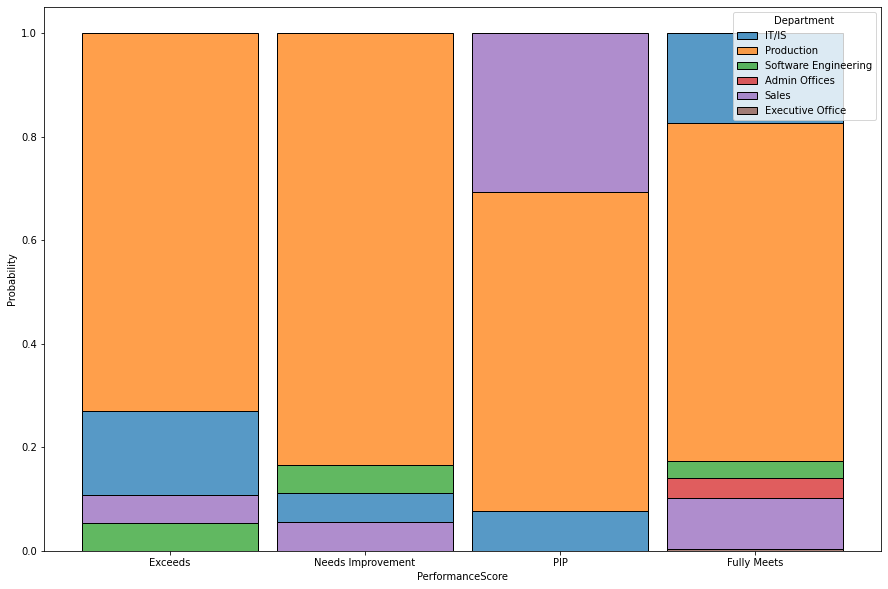

In [57]:
plt.figure(figsize=(15, 10))
for ps in perfs:
  sns.histplot(x='PerformanceScore', hue='Department', multiple='stack', shrink=.9, stat='probability',palette=palette1, data=df[df['PerformanceScore']==ps])

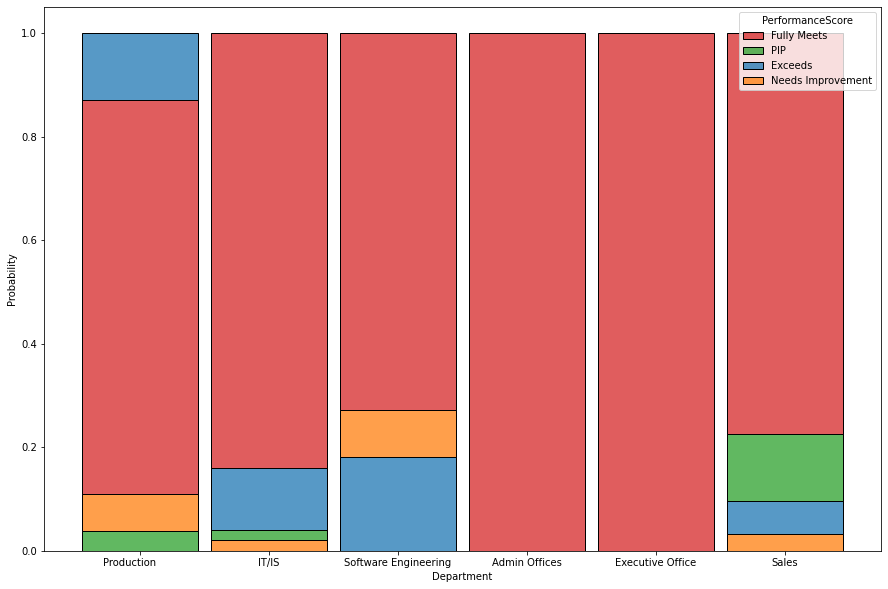

In [58]:
plt.figure(figsize=(15, 10))
for dp in dps:
  sns.histplot(x='Department', hue='PerformanceScore', multiple='stack', shrink=.9, stat='probability',palette=palette2, data=df[df['Department']==dp])

The sales department needs to be watched since it's the department which requires the most performance improvement plan (PIP). These have been set to address failures to meet specific job goals or to ameliorate behavior-related concerns. 

How many managers are there in the company ?

In [59]:
print(len(df['ManagerName'].unique()), "unique managers are currently working in the company :", df['ManagerName'].unique())

21 unique managers are currently working in the company : ['Michael Albert' 'Simon Roup' 'Kissy Sullivan' 'Elijiah Gray'
 'Webster Butler' 'Amy Dunn' 'Alex Sweetwater' 'Ketsia Liebig'
 'Brannon Miller' 'Peter Monroe' 'David Stanley' 'Kelley Spirea'
 'Brandon R. LeBlanc' 'Janet King' 'John Smith' 'Jennifer Zamora'
 'Lynn Daneault' 'Eric Dougall' 'Debra Houlihan' 'Brian Champaigne'
 'Board of Directors']


As PerformanceScore is a categorical and ordinal feature, it is a good practice for machine learning purpose to encode it using LabelEncoder. Sklearn library contains a preprocessing method called LabelEncoder to do so but we can also do it manually to decide which numerical value we assign to each category. Later, we'll use the replace method to do the encoding. But for the moment, we can keep it like it is to perform the plotting.

In [60]:
df_copy = df.copy()
#df_copy['PerformanceScore'].replace({'Exceeds':3, 'Fully Meets':2, 'Needs Improvement':1, 'PIP':0}, inplace=True)

# convert the float ManagerID field to string and remove the .0 at the end of each value
df_copy['ManagerID'] = df['ManagerID'].astype(str)
df_copy['ManagerID'] = df_copy['ManagerID'].apply(lambda x : x.split('.')[0])

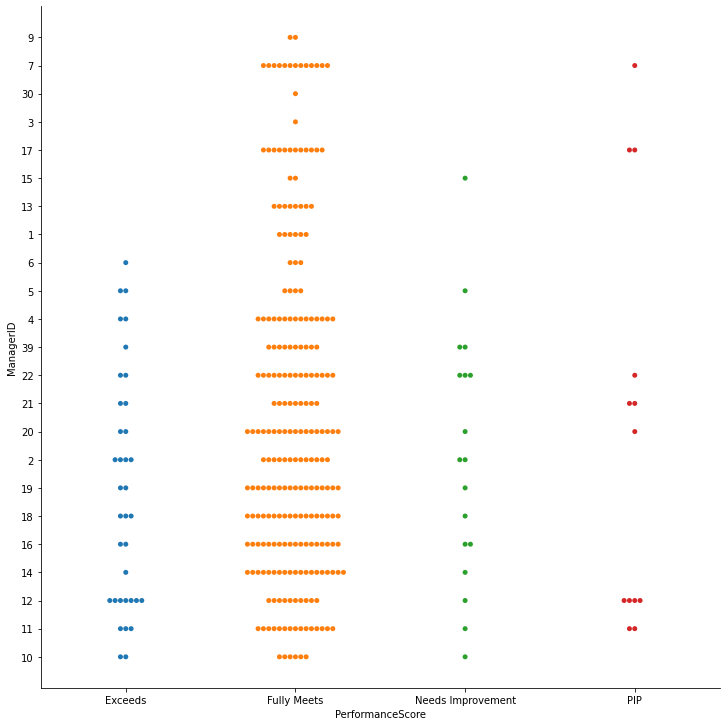

In [61]:
sns.catplot(y='ManagerID', x='PerformanceScore', kind='swarm', data=df_copy[df_copy['ManagerID']!='nan'], height=10, aspect=1)

In [62]:
# Simple method to see performance results for each manager through a dataframe
df_copy.groupby('ManagerID')['PerformanceScore'].value_counts()

ManagerID  PerformanceScore 
1          Fully Meets           6
10         Fully Meets           6
           Exceeds               2
           Needs Improvement     1
11         Fully Meets          15
           Exceeds               3
           PIP                   2
           Needs Improvement     1
12         Fully Meets          10
           Exceeds               7
           PIP                   4
           Needs Improvement     1
13         Fully Meets           8
14         Fully Meets          19
           Exceeds               1
           Needs Improvement     1
15         Fully Meets           2
           Needs Improvement     1
16         Fully Meets          18
           Exceeds               2
           Needs Improvement     2
17         Fully Meets          12
           PIP                   2
18         Fully Meets          18
           Exceeds               3
           Needs Improvement     1
19         Fully Meets          18
           Exceeds        

In [63]:
#df_copy = df.copy()
#df_copy['ManagerID'] = df['ManagerID'].astype(str)
#df_copy['ManagerID'] = df_copy['ManagerID'].apply(lambda x : x.split('.')[0])
ids = ['30', '4', '20', '16', '39', '11', '10', '19', '12', '7', '14', '18', '3', '2', '1', '17', '5', '21', '6', '15', '13', '9', '22']

Plotting the performance scores for each individual manager is relevant to see how they perform individually :

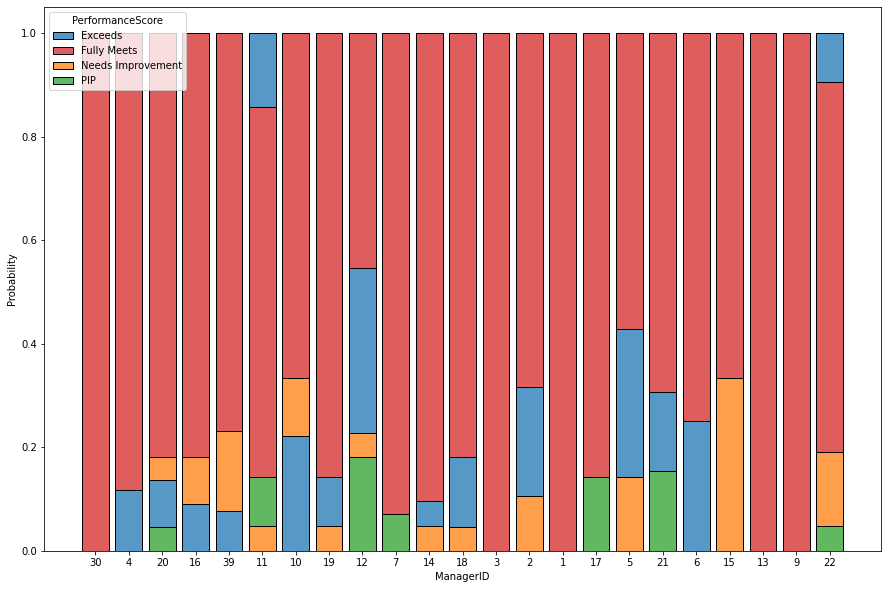

In [64]:
plt.figure(figsize=(15, 10))
for id in ids:
  sns.histplot(x='ManagerID', data=df_copy[df_copy['ManagerID']==id], hue='PerformanceScore', stat='probability', multiple='stack', shrink=0.8, palette=palette2)

Which managers supervise the most in the company ?

In [65]:
ManagersIds = df_copy.groupby('ManagerID')['PerformanceScore'].count().sort_values(ascending=False).index

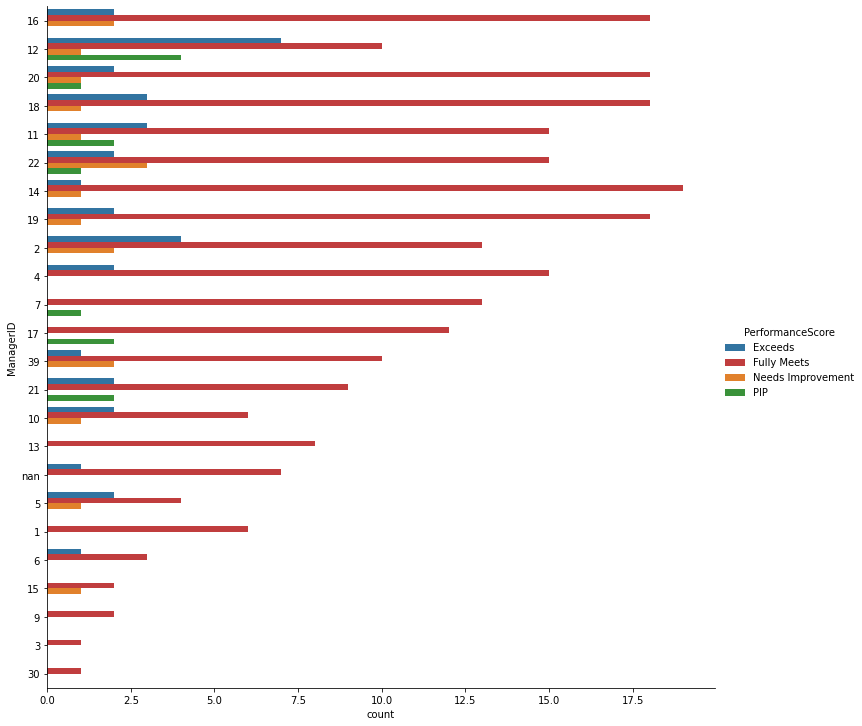

In [66]:
sns.catplot(y='ManagerID', hue='PerformanceScore', kind='count', data=df_copy, order=ManagersIds, palette=palette2, height=10, aspect=1)

Let's order them by decreasing number of good results :

In [67]:
# Ordering managers by number of good results
ManagersIds = df_copy.groupby('PerformanceScore')['ManagerID'].value_counts().reset_index(name='count')['ManagerID'].unique()

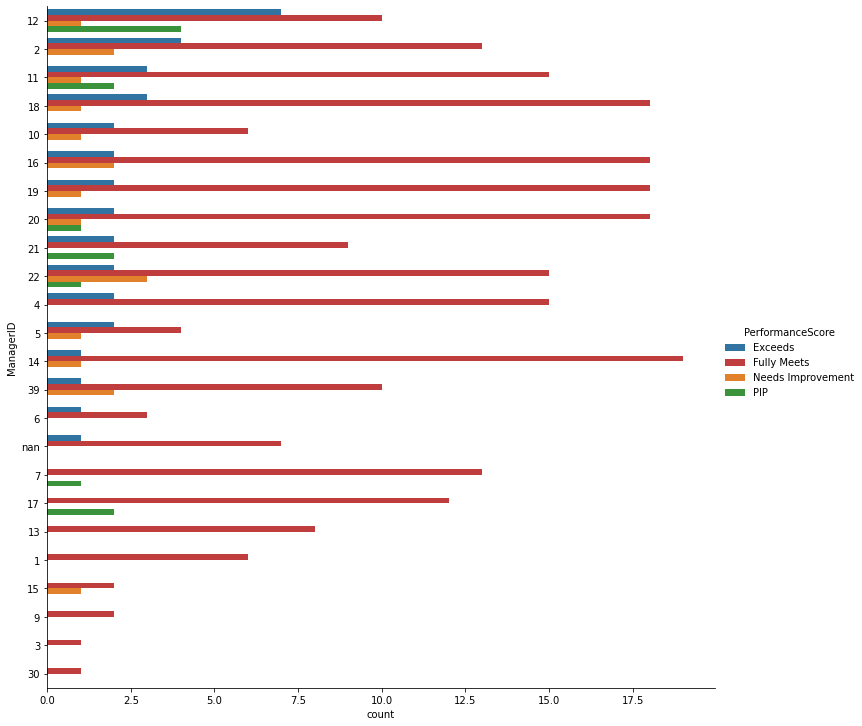

In [68]:
sns.catplot(y='ManagerID', hue='PerformanceScore', kind='count', data=df_copy, palette=palette2, order=ManagersIds, height=10, aspect=1)

It's also interesting to see the distribution of salaries between individuals having different performance scores and differents managers supervising them :

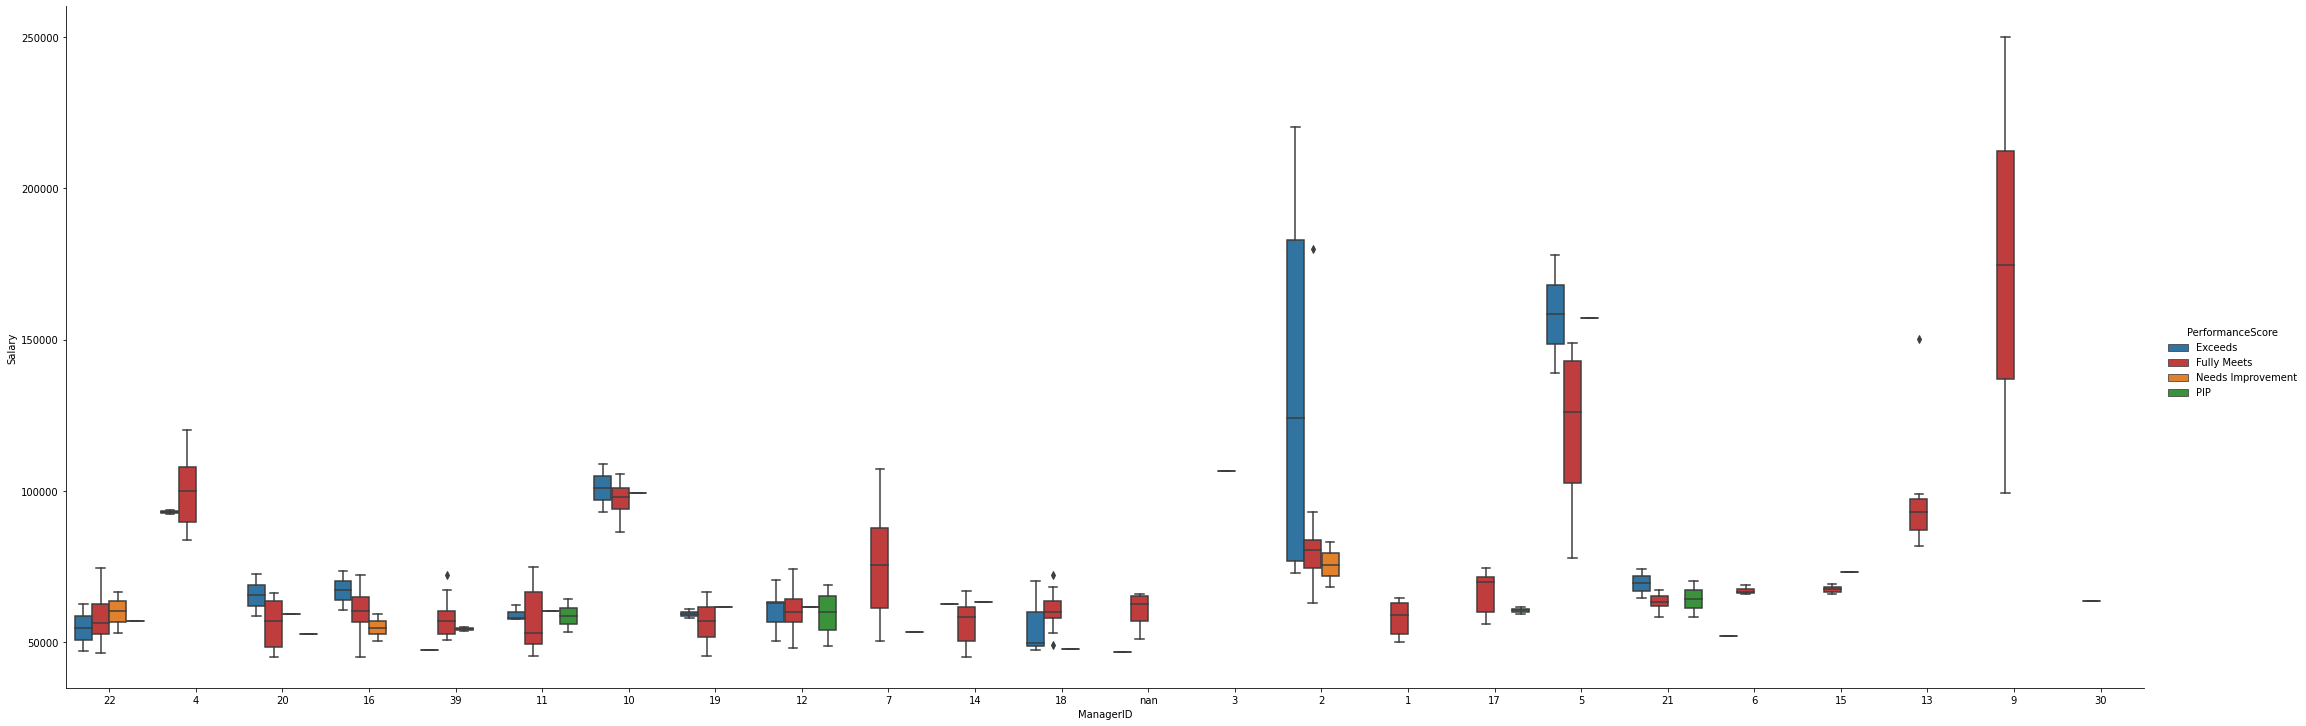

In [69]:
sns.catplot(x='ManagerID', y='Salary', hue='PerformanceScore', kind='box', palette=palette2, data=df_copy, height=10, aspect=3)

In [70]:
df_copy.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### *What is the overall diversity profile of the organization ?*

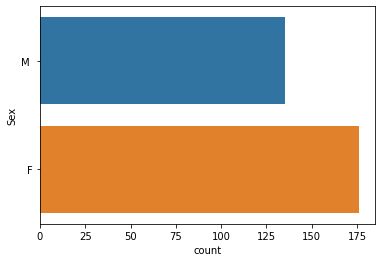

In [71]:
sns.countplot(y=df['Sex'])

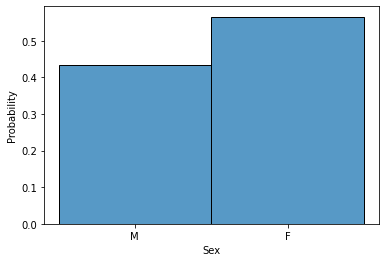

In [72]:
sns.histplot(x='Sex', data=df, stat='probability')

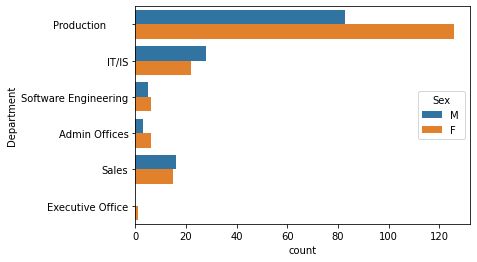

In [73]:
sns.countplot(y=df['Department'], hue=df['Sex'])

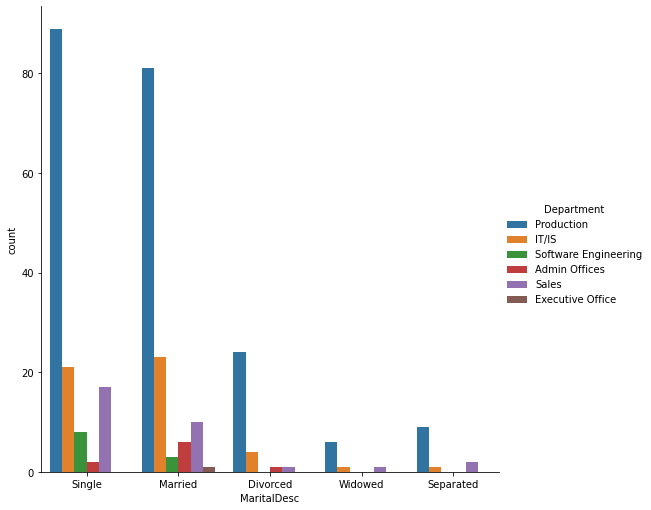

In [74]:
sns.catplot(x='MaritalDesc', hue='Department', data=df, kind="count",height=7, aspect=1)

In [75]:
races = df.groupby('RaceDesc')['EmpID'].count().sort_values(ascending=False).index
df.groupby('RaceDesc')['EmpID'].count().sort_values(ascending=False)

RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: EmpID, dtype: int64

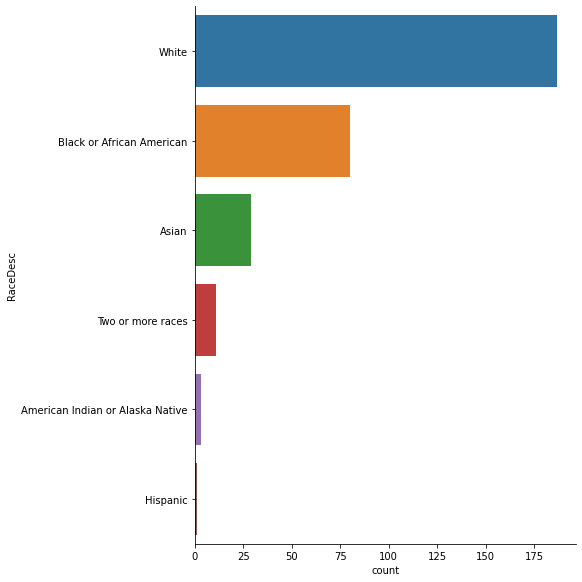

In [76]:
sns.catplot(y='RaceDesc', data=df, kind='count', order=races,height=8, aspect=1)

In [77]:
df['Sex'].unique()

array(['M ', 'F'], dtype=object)

In [78]:
palette3 ={"M ": "C0", "F": "C1"}
races = ['White', 'Black or African American', 'Two or more races', 'Asian', 'Hispanic', 'American Indian or Alaska Native']
palette4 ={'White':"C0", 'Black or African American':"C1", 'Two or more races':"C2", 'Asian':"C3", 'Hispanic':"C4", 'American Indian or Alaska Native':"C5"}

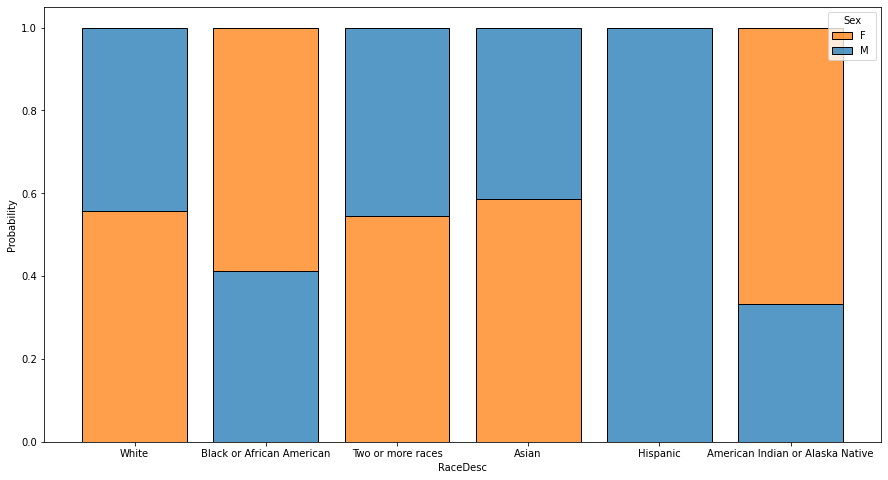

In [79]:
plt.figure(figsize=(15, 8))
for r in races:
  sns.histplot(x='RaceDesc', hue="Sex", multiple="stack", data=df[df['RaceDesc']==r], palette=palette3, stat='probability', shrink=.8)

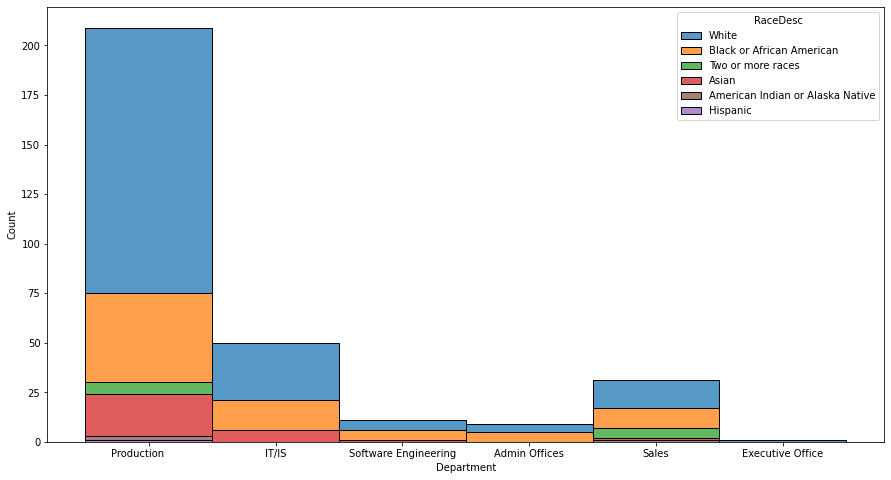

In [80]:
plt.figure(figsize=(15, 8))
sns.histplot(x='Department', hue='RaceDesc', palette=palette4, multiple='stack', data=df)

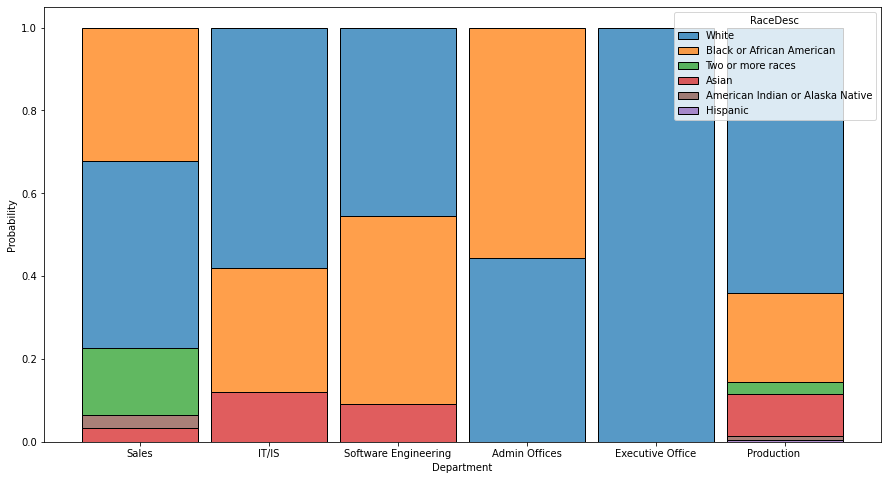

In [81]:
dps = ['Sales', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Executive Office','Production       ']
plt.figure(figsize=(15, 8))
for d in dps:
  sns.histplot(x='Department', hue='RaceDesc', palette=palette4, stat='probability', multiple='stack', shrink=0.9, data=df[df['Department']==d])

### *What are our best recruiting sources if we want to ensure a diverse organization ?*

In [82]:
df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

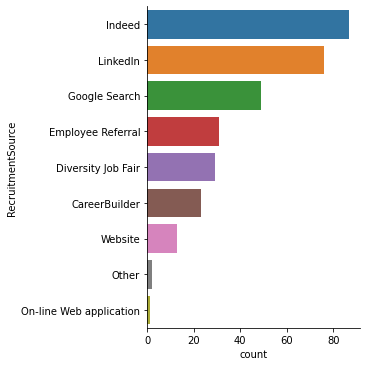

In [83]:
sns.catplot(y='RecruitmentSource', kind='count', order=df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).index, data=df)

In [84]:
sources = ['Other', 'LinkedIn', 'Google Search', 'Employee Referral','Diversity Job Fair', 'On-line Web application', 'CareerBuilder', 'Website', 'Indeed']

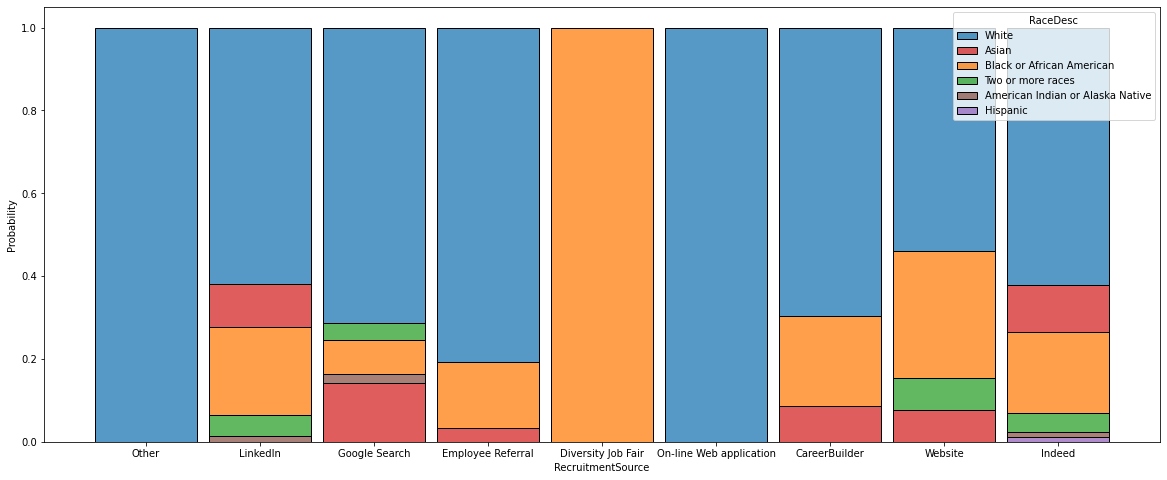

In [85]:
plt.figure(figsize=(20, 8))
for s in sources:
  sns.histplot(x='RecruitmentSource', hue='RaceDesc', data=df[df['RecruitmentSource']==s], stat='probability', palette=palette4,shrink=0.9, multiple='stack')

### *Are there areas of the company where pay is not equitable ?*

First, let's have a quick view on the distribution of salaries in the company. We can plot it by count :

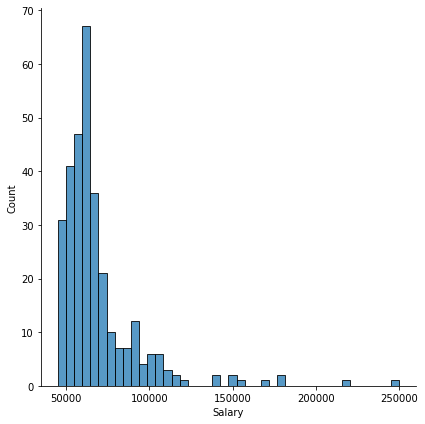

In [86]:
sns.displot(x=df['Salary'], height=6, aspect=1)

Or by density :

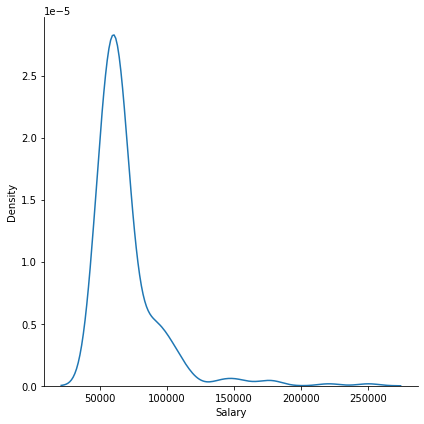

In [87]:
sns.displot(x=df['Salary'], kind='kde', height=6, aspect=1)

Box plots give us informations about quartiles (Q1, Q2 or median, Q3) and outliers :

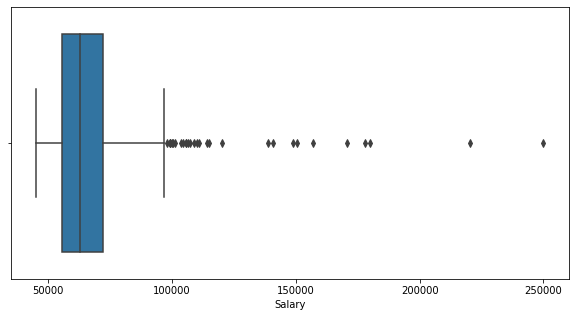

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Salary'])

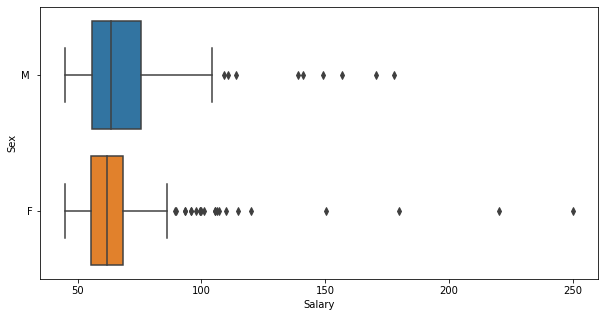

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Sex'], x=df['Salary']/1000)

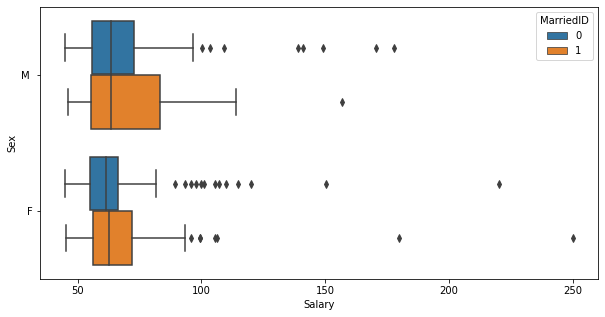

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Sex'], x=df['Salary']/1000, hue=df['MarriedID'])

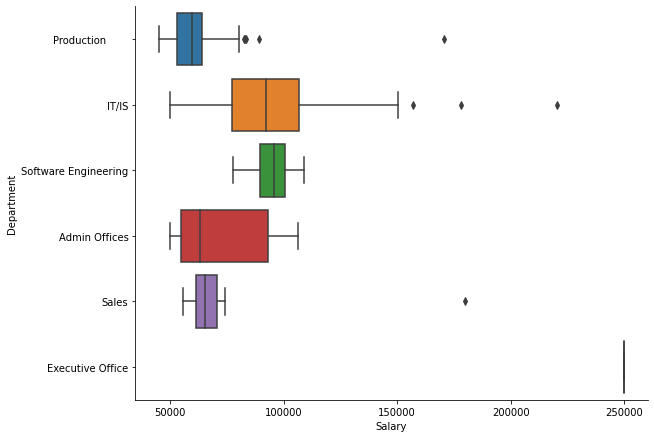

In [91]:
sns.catplot(y='Department', x='Salary', data=df, kind="box", height = 6, aspect = 1.5)

Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution :



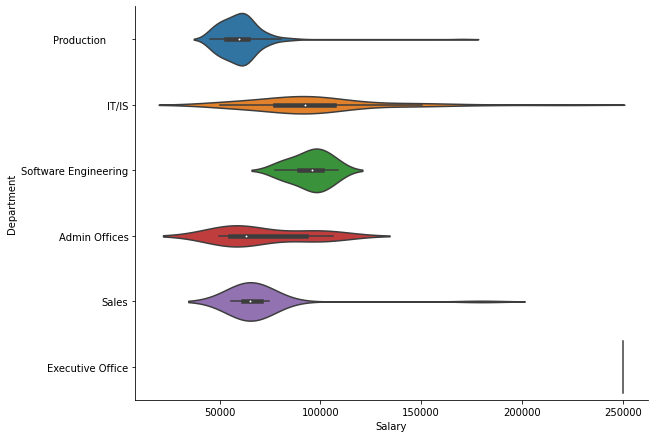

In [92]:
sns.catplot(y='Department', x='Salary', data=df, kind="violin", height = 6, aspect = 1.5)

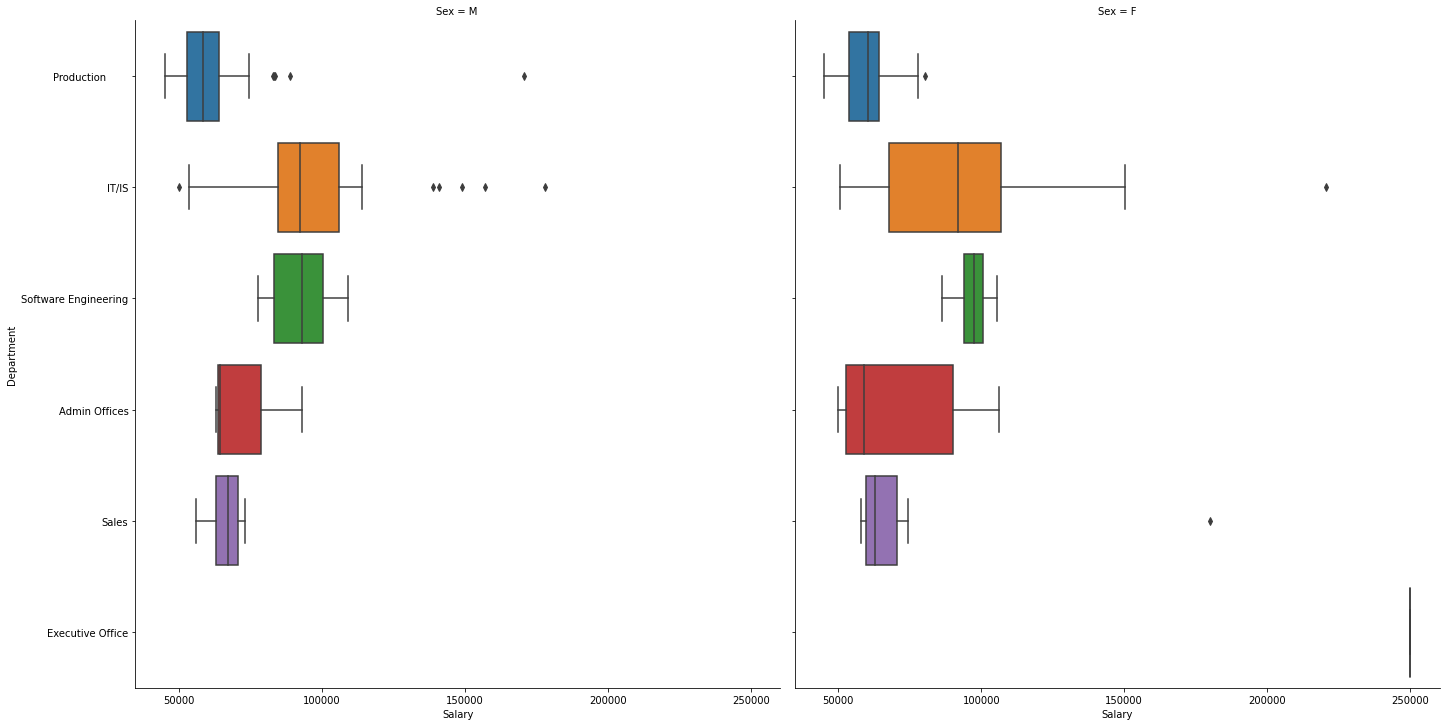

In [93]:
sns.catplot(y='Department', x='Salary', col='Sex', data=df, kind="box", height = 10, aspect = 1)

### Can we get an intuition on who are the terminated employees ?

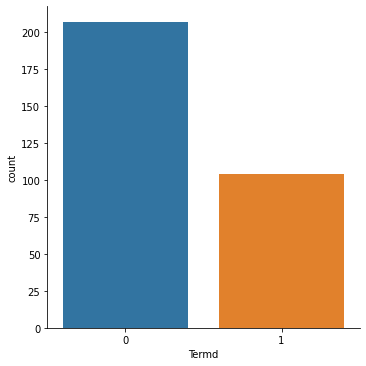

In [94]:
sns.catplot(data=df, x='Termd', kind='count')

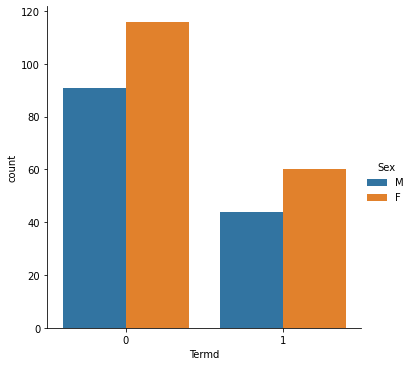

In [95]:
sns.catplot(data=df, x='Termd', hue='Sex', kind='count')

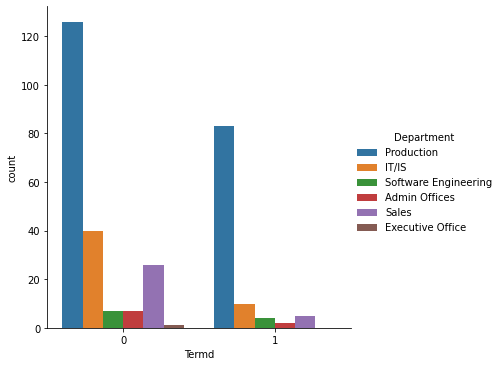

In [96]:
sns.catplot(data=df, x='Termd', hue='Department', kind='count')

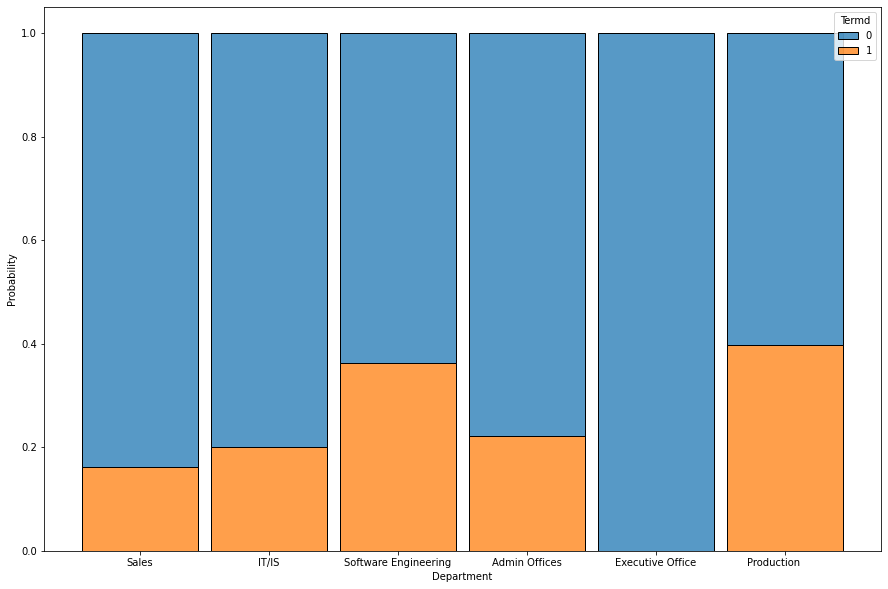

In [97]:
palette5 ={0: "C0", 1: "C1"}
plt.figure(figsize=(15, 10))
for dp in dps:
  sns.histplot(x='Department', hue='Termd', multiple='stack', shrink=.9, stat='probability',palette=palette5, data=df[df['Department']==dp])

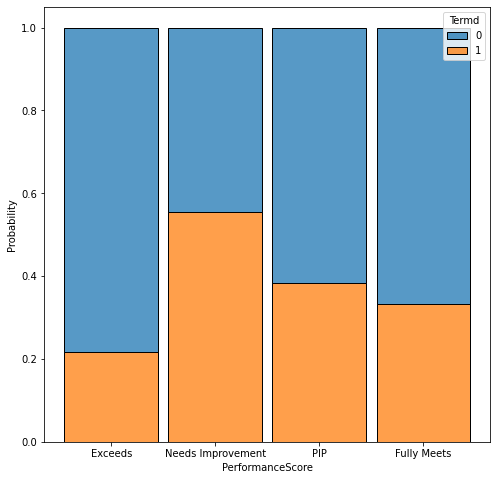

In [111]:
plt.figure(figsize=(8, 8))
for ps in perfs:
  sns.histplot(x='PerformanceScore', hue='Termd', multiple='stack', shrink=.9, stat='probability',palette=palette5, data=df[df['PerformanceScore']==ps])

In [98]:
df['Age'] = df['DOB'].map(lambda x: 120 - int(x.split('/')[-1]))

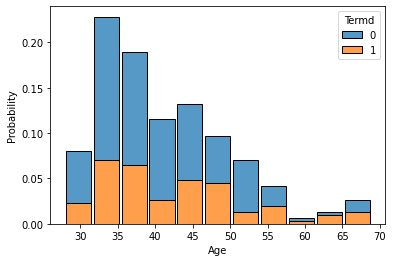

In [99]:
sns.histplot(x='Age', hue='Termd', multiple='stack', shrink=.9, stat='probability', palette=palette5, data=df)

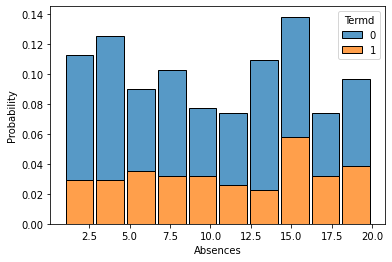

In [100]:
sns.histplot(x='Absences', hue='Termd', multiple='stack', shrink=.9, stat='probability', palette=palette5, data=df)

In [101]:
bins = np.linspace(df['Salary'].min(),df['Salary'].max(),10)

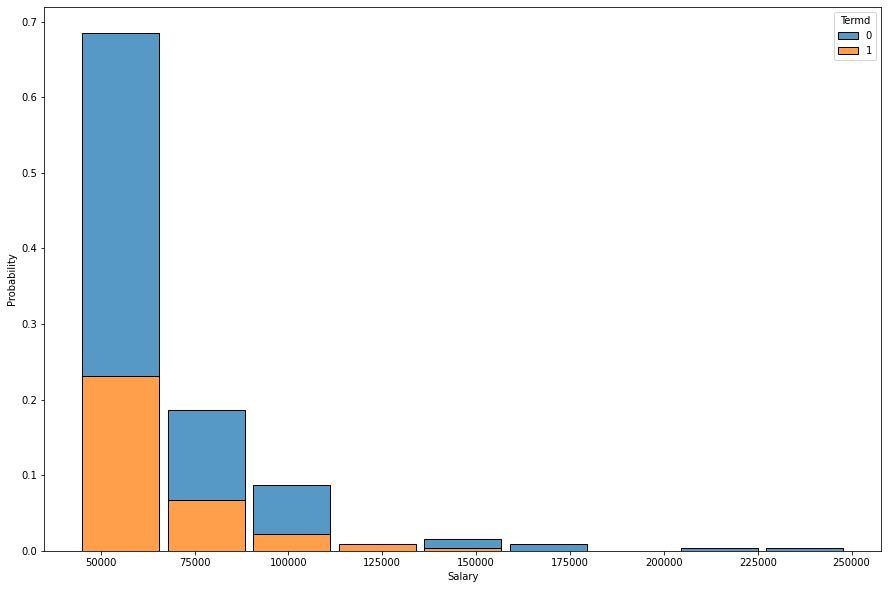

In [102]:
plt.figure(figsize=(15,10))
sns.histplot(x='Salary', hue='Termd', multiple='stack', shrink=.9, stat='probability', bins=bins, palette=palette5, data=df)

### *Which profiles tend to cumulate absences or to have a poor satisfaction working in the company ?*


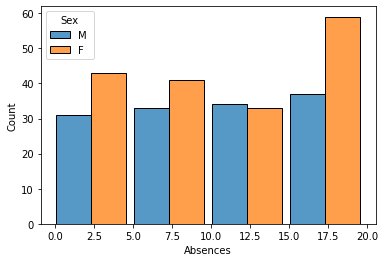

In [103]:
bins = np.arange(0,df['Absences'].max()+1,5)
sns.histplot(x='Absences', hue='Sex', shrink=.9, stat='count', multiple='dodge', palette=palette3, bins=bins, data=df)

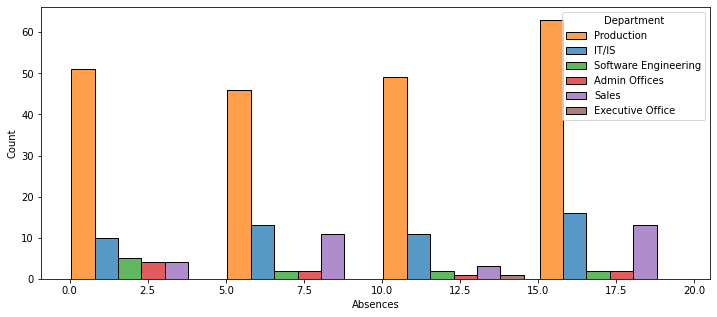

In [104]:
plt.figure(figsize=(12,5))
sns.histplot(x='Absences', hue='Department', shrink=.9, stat='count', multiple='dodge', palette=palette1, bins=bins, data=df)

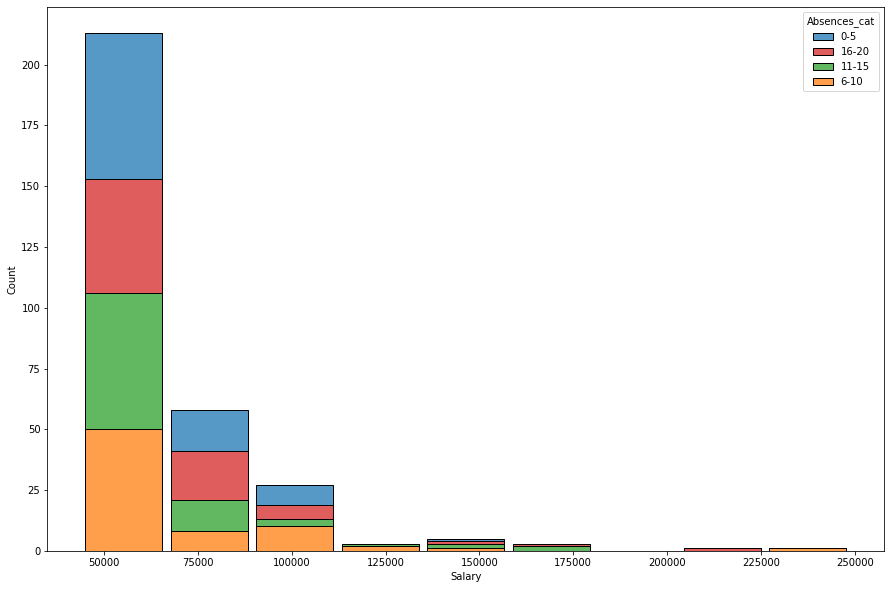

In [105]:
def categorize_absences(x):
  if (x >= 0 and x <=5):
    return '0-5'
  elif (x >= 6 and x <=10):
    return '6-10'
  elif (x >= 11 and x <=15):
    return '11-15'
  elif (x >= 16 and x <=20):
    return '16-20'
bins_sal = np.linspace(df['Salary'].min(),df['Salary'].max(),10)
plt.figure(figsize=(15,10))
df['Absences_cat'] = df['Absences'].map(lambda x: categorize_absences(x))
palette6 ={'0-5':"C0", '6-10':"C1", '11-15':"C2", '16-20':"C3"}
sns.histplot(x='Salary', hue='Absences_cat', multiple='stack', shrink=.9, stat='count', bins=bins_sal, palette=palette6, data=df)

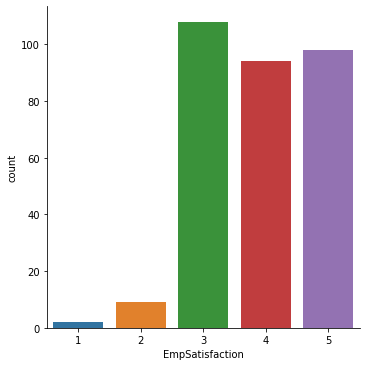

In [106]:
sns.catplot(data=df, x='EmpSatisfaction', kind='count')

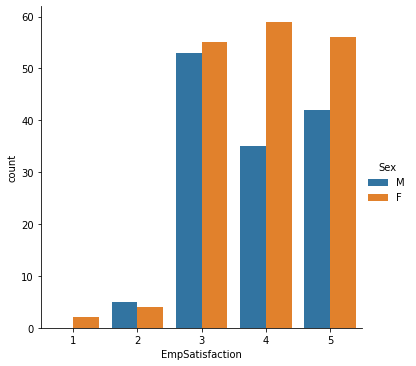

In [107]:
sns.catplot(data=df, x='EmpSatisfaction', hue='Sex', kind='count')

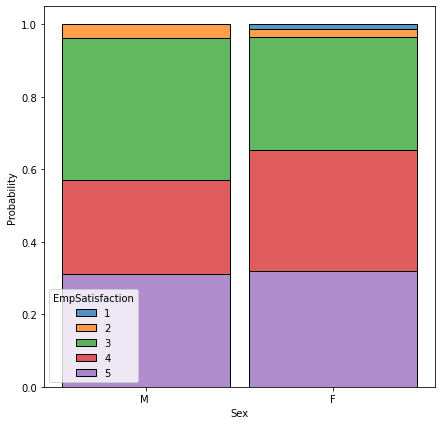

In [109]:
palette7 ={1:"C0", 2:"C1", 3:"C2", 4:"C3", 5:"C4"}
plt.figure(figsize=(7,7))
for s in df['Sex'].unique():
  sns.histplot(x='Sex', hue='EmpSatisfaction', multiple='stack', shrink=.9, stat='probability',palette=palette7, data=df[df['Sex']==s])

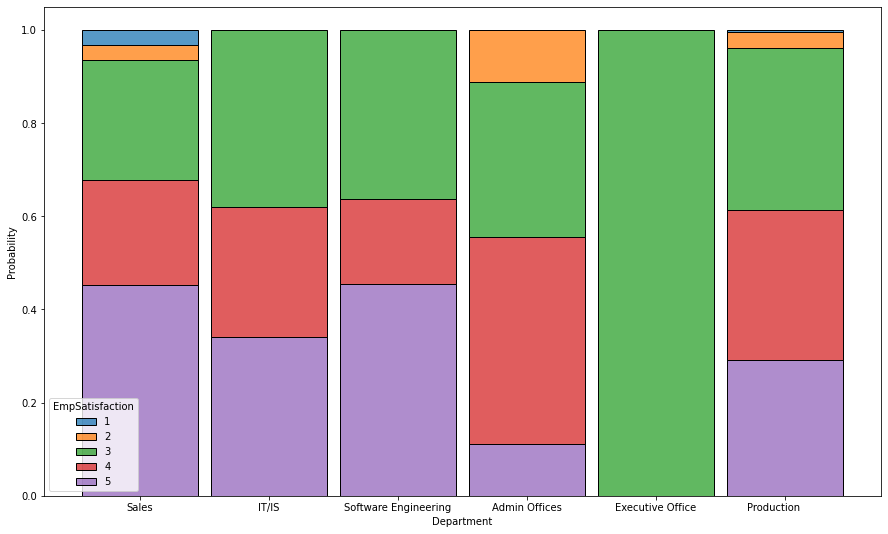

In [112]:
palette7 = {1:"C0", 2:"C1", 3:"C2", 4:"C3", 5:"C4"}
plt.figure(figsize=(15,9))
for dp in dps:
  sns.histplot(x='Department', hue='EmpSatisfaction', multiple='stack', shrink=.9, stat='probability',palette=palette7, data=df[df['Department']==dp])

## Part 2. Machine Learning to predict Employee Termination

### Data Preparation

1. Data Cleaning
2. Imputer if needed
3. Handling categorical attributes - OneHotEncoder, LabelEncoder
4. Attribute addition - Adding custom transformation
5. Setting up Data Transformation Pipeline for numerical and categorical columns

In [118]:
df = pd.read_csv('HRDataset_v14.csv')

In [119]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [121]:
# Check unique values for each fields except a few ones not so relevant or with too many unique values
for c in df.columns:
  if df[c].dtype == object and (c not in ('Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date', 'ManagerName')):
    print(c, df[c].unique())

Position ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
State ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']
Sex ['M ' 'F']
MaritalDesc ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
CitizenDesc ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
HispanicLatino ['No' 'Yes' 'no' 'yes']
RaceDesc ['White'

In [122]:
# Here we see there is a problem of redundant values in Position (Data Analyst) and in HispanicLatino (No and Yes)
# Let's handle that using the replace method

def preprocess_redundant_vals(df):
  df['HispanicLatino'].replace({'yes': 'Yes', 'no': 'No'}, inplace=True)
  df['Position'].replace({'Data Analyst ': 'Data Analyst'}, inplace=True)
  return df

In [123]:
print(df['Position'].unique())
print(df['HispanicLatino'].unique())

['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
['No' 'Yes' 'no' 'yes']


In [124]:
def add_extra_feature(df):
  df['Age'] = df['DOB'].map(lambda x: 120 - int(x.split('/')[-1]))
  return df

In [125]:
# We need to convert into date the datatype of each date field

def preprocess_date_cols(df):
  df['DOB'] = pd.to_datetime(df['DOB'])
  df['DateofHire'] = pd.to_datetime(df['DateofHire'])
  df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
  df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
  return df

In [126]:
# Let's drop all the ID columns as we are going to encode all the categorical fields by ourselves using a Pipeline, with Label and One Hot Encoding
# We also remove all the features related to our target Termd which indicates if an employee is terminated or not
# And any feature which won't be useful

def drop_features(df):
  df.drop(labels=['Employee_Name','ManagerID','EmpID','EmpStatusID','DeptID','PerfScoreID','FromDiversityJobFairID','PositionID','MaritalStatusID','MarriedID','GenderID','TermReason','EmploymentStatus','DateofTermination','Zip','DOB','DateofHire','LastPerformanceReview_Date'],axis=1,inplace=True)
  return df

In [127]:
from sklearn.pipeline import Pipeline

# We can distinguish ordinal from nominal attributes, ordinal ones follow a specific order

cat_ord_attrs = ['PerformanceScore']
cat_nom_attrs = ['Position', 'State', 'Sex','MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc','Department', 'ManagerName', 'RecruitmentSource']

In [128]:
##Transform different columns or subsets using ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_pipeline = ColumnTransformer([
        ("cat_nom", OneHotEncoder(), cat_nom_attrs),
        ("cat_ord", OrdinalEncoder(), cat_ord_attrs),
    ])

In [129]:
def concat_all_columns(dataframe):
  dataframe['Salary'] = df['Salary']
  dataframe['Termd'] = df['Termd']
  dataframe['EngagementSurvey'] = df['EngagementSurvey']
  dataframe['EmpSatisfaction'] = df['EmpSatisfaction']
  dataframe['SpecialProjectsCount'] = df['SpecialProjectsCount']
  dataframe['DaysLateLast30'] = df['DaysLateLast30']
  dataframe['Absences'] = df['Absences']
  dataframe['Age'] = df['Age']
  return dataframe

In [130]:
def preprocess_df(df):
  df = preprocess_redundant_vals(df)
  df = add_extra_feature(df)
  df = preprocess_date_cols(df)
  df = drop_features(df)
  df = cat_pipeline.fit_transform(df)
  column_name = np.append(cat_pipeline.transformers_[0][1].get_feature_names(cat_nom_attrs),'PerformanceScore')
  df =  pd.DataFrame(df.toarray(), columns=column_name) # data back into a dataframe
  prepared_data = concat_all_columns(df)
  return prepared_data

df = pd.read_csv('HRDataset_v14.csv')
prepared_data = preprocess_df(df)
prepared_data.head()

,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_Enterprise Architect,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,Position_IT Manager - Support,Position_IT Support,Position_Network Engineer,Position_President & CEO,Position_Principal Data Architect,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer,State_AL,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,...,Department_Software Engineering,ManagerName_Alex Sweetwater,ManagerName_Amy Dunn,ManagerName_Board of Directors,ManagerName_Brandon R. LeBlanc,ManagerName_Brannon Miller,ManagerName_Brian Champaigne,ManagerName_David Stanley,ManagerName_Debra Houlihan,ManagerName_Elijiah Gray,ManagerName_Eric Dougall,ManagerName_Janet King,ManagerName_Jennifer Zamora,ManagerName_John Smith,ManagerName_Kelley Spirea,ManagerName_Ketsia Liebig,ManagerName_Kissy Sullivan,ManagerName_Lynn Daneault,ManagerName_Michael Albert,ManagerName_Peter Monroe,ManagerName_Simon Roup,ManagerName_Webster Butler,RecruitmentSource_CareerBuilder,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62506,0,4.60,5,0,0,1,37
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,104437,1,4.96,3,6,0,17,45
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,64955,1,3.02,3,0,0,3,32
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,64991,0,4.84,5,0,0,15,32
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50825,1,5.00,4,0,0,2,31


In [131]:
# Now that we have the full dataset, it's time to split it into a train and test set to perform the model building
X = prepared_data[[c for c in prepared_data.columns if c != 'Termd']]
y = prepared_data['Termd']

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
scaler = StandardScaler()
X_test = scaler.fit(X_test).transform(X_test)

In [133]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(248, 121) (63, 121) (248,) (63,)


### Selecting and Training models

In [134]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(X_train, y_train)

# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# SVM

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###Model Evaluation using Cross Validation - Before Tuning

In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_test, y_test, scoring="neg_log_loss", cv = 10)
print("Logistic Regression : ", scores)

scores = cross_val_score(tree_clf, X_test, y_test, scoring="accuracy", cv = 10)
print("Decision Tree : ", scores)

scores = cross_val_score(rf_clf, X_test, y_test, scoring="accuracy", cv = 10)
print("Random Forest : ", scores)

scores = cross_val_score(gbt_clf, X_test, y_test, scoring="accuracy", cv = 10)
print("Gradient Boosting : ", scores)

scores = cross_val_score(knn_clf, X_test, y_test, scoring="accuracy", cv = 10)
print("KNN : ", scores)

scores = cross_val_score(svm_clf, X_test, y_test, scoring="accuracy", cv = 10)
print("SVM : ", scores)

Logistic Regression :  [-1.93105257 -0.56634424 -1.45602157 -0.8189089  -0.59829522 -0.69115927
 -0.62617177 -2.98139959 -1.47306438 -0.81323997]
Decision Tree :  [0.85714286 0.42857143 0.57142857 0.5        0.66666667 0.16666667
 0.5        0.33333333 0.66666667 0.5       ]
Random Forest :  [0.71428571 0.85714286 0.28571429 0.5        0.66666667 0.5
 0.5        0.33333333 0.5        0.5       ]
Gradient Boosting :  [0.42857143 0.28571429 0.71428571 0.66666667 0.83333333 0.33333333
 0.5        0.33333333 0.66666667 0.33333333]
KNN :  [0.71428571 0.57142857 0.71428571 0.5        0.5        0.66666667
 0.5        0.33333333 0.5        0.66666667]
SVM :  [0.71428571 0.57142857 0.85714286 0.66666667 0.5        0.66666667
 0.5        0.33333333 0.33333333 0.66666667]


### Hyperparameter Tuning using GridSearchCV

In [136]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(1, 16),               
              'weights':['uniform', 'distance']}
# KNN
knn_clf1 = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='accuracy') 
knn_clf1.fit(X_train, y_train)
print("The best parameters obtained by CV:", knn_clf1.best_params_)
print("The best score obtained by CV = {:5.3f}".format(knn_clf1.best_score_))

The best parameters obtained by CV: {'n_neighbors': 14, 'weights': 'uniform'}
The best score obtained by CV = 0.722


In [137]:
parameters = {'max_depth':range(1, 16),               
              'criterion':['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'max_features':['sqrt', 'log2']}
# Decision Tree
tree_clf2 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='accuracy')
tree_clf2.fit(X_train, y_train)
print("The best parameters by CV:", tree_clf2.best_params_)
print("The best score by CV = {:5.3f}".format(tree_clf2.best_score_))

The best parameters by CV: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'splitter': 'random'}
The best score by CV = 0.722


In [138]:
parameters = {'n_estimators': [50, 100, 150, 200],               
              'criterion':['gini', 'entropy'],
              'max_features' : ['sqrt', 'log2']}
# Random Forest
rf_clf3 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy')
rf_clf3.fit(X_train, y_train)
print("The best parameters by CV:", rf_clf3.best_params_)
print("The best score by CV = {:5.3f}".format(rf_clf3.best_score_))

The best parameters by CV: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}
The best score by CV = 0.706


In [139]:
parameters = {'learning_rate': [0.05, 0.1, 0.2, 0.3],
              'n_estimators': [50, 100, 150, 200],             
              'loss':['deviance', 'exponential'],
              'max_features' : ['sqrt', 'log2']}
# Gradient boosting
gbt_clf4 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, scoring='accuracy')
gbt_clf4.fit(X_train, y_train)
print("The best parameters by CV:", gbt_clf4.best_params_)
print("The best score by CV = {:5.3f}".format(gbt_clf4.best_score_))

The best parameters by CV: {'learning_rate': 0.2, 'loss': 'exponential', 'max_features': 'log2', 'n_estimators': 50}
The best score by CV = 0.738


In [140]:
parameters = {'C':[0.5,0.8, 0.9, 1],               
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Logistic Regression
lr_clf5 = GridSearchCV(LogisticRegression(max_iter=50000), parameters, cv=5, scoring='accuracy')
lr_clf5.fit(X_train, y_train)
print("The best parameters by CV:", lr_clf5.best_params_)
print("The best score by CV = {:5.3f}".format(lr_clf5.best_score_))

The best parameters by CV: {'C': 0.8, 'solver': 'newton-cg'}
The best score by CV = 0.746


In [141]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
# SVM
svm_clf6 = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy') # same as scoring='accuracy'
svm_clf6.fit(X_train, y_train)
print("The best parameters by CV:", svm_clf6.best_params_)
print("The best score by CV = {:5.3f}".format(svm_clf6.best_score_))

The best parameters by CV: {'kernel': 'linear'}
The best score by CV = 0.710


### Save the best model

In [143]:
import pickle

##saving the model
with open("lr_model.pkl", 'wb') as f_out:
    pickle.dump(lr_clf5, f_out)
    f_out.close()